In [1]:
# === 1. Imports ===
import pandas as pd
import numpy as np
import random
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# === 2. Generate Synthetic Dataset ===
random.seed(42)

users = ["Alice", "Bob", "Charlie", "Diana"]
categories = ["Bug", "Feature", "Meeting", "Documentation"]
priorities = ["High", "Medium", "Low"]
statuses = ["Open", "In Progress", "Done"]

descriptions = {
    "Bug": [
        "Fix login issue on mobile app",
        "Error in data export module",
        "Page crashes when submitting form"
    ],
    "Feature": [
        "Add dark mode to dashboard",
        "Implement task reminder notification",
        "Create user profile section"
    ],
    "Meeting": [
        "Client call to discuss roadmap",
        "Sprint planning session with team",
        "Demo presentation preparation"
    ],
    "Documentation": [
        "Update user guide for new features",
        "Write API reference for devs",
        "Document testing procedures"
    ]
}

def generate_task(id):
    cat = random.choice(categories)
    return {
        "task_id": f"T{id:03}",
        "description": random.choice(descriptions[cat]),
        "deadline": pd.Timestamp("2025-08-01") - pd.Timedelta(days=random.randint(1, 15)),
        "assigned_to": random.choice(users),
        "status": random.choice(statuses),
        "priority": random.choices(priorities, weights=[0.3, 0.5, 0.2])[0],
        "category": cat
    }

# Generate 100 tasks
tasks = [generate_task(i) for i in range(100)]
df = pd.DataFrame(tasks)

# Save to CSV
df.to_csv("../data/task_data.csv", index=False)

print("Sample data:\n")
df.head()


Sample data:



,task_id,description,deadline,assigned_to,status,priority,category
0,T000,Fix login issue on mobile app,2025-07-20,Charlie,Open,High,Bug
1,T001,Page crashes when submitting form,2025-07-20,Alice,Done,Medium,Bug
2,T002,Fix login issue on mobile app,2025-07-28,Bob,Done,Medium,Bug
3,T003,Create user profile section,2025-07-21,Diana,Open,Medium,Feature
4,T004,Client call to discuss roadmap,2025-07-19,Bob,Done,Medium,Meeting



Category distribution:
 category
Bug              29
Meeting          27
Feature          25
Documentation    19
Name: count, dtype: int64

Priority distribution:
 priority
Medium    46
High      29
Low       25
Name: count, dtype: int64


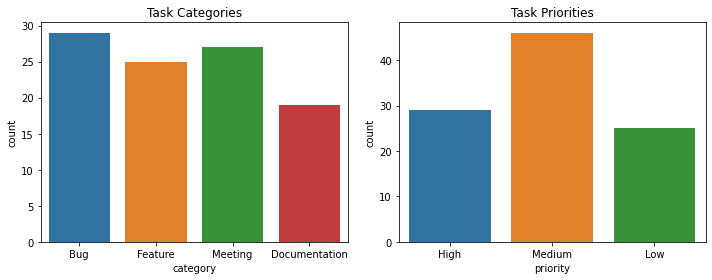

In [3]:
# === 3. Basic EDA ===

print("\nCategory distribution:\n", df["category"].value_counts())
print("\nPriority distribution:\n", df["priority"].value_counts())

# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="category")
plt.title("Task Categories")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="priority")
plt.title("Task Priorities")

plt.tight_layout()
plt.show()


In [4]:
# === 4. NLP Preprocessing ===

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase + remove non-alphabetic
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords + stem
    filtered = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['clean_description'] = df['description'].apply(clean_text)

# Save cleaned version
df.to_csv("../data/cleaned_task_data.csv", index=False)

print("\nSample cleaned text:\n")
df[['description', 'clean_description']].head()



Sample cleaned text:



,description,clean_description
0,Fix login issue on mobile app,fix login issu mobil app
1,Page crashes when submitting form,page crash submit form
2,Fix login issue on mobile app,fix login issu mobil app
3,Create user profile section,creat user profil section
4,Client call to discuss roadmap,client call discuss roadmap
